In [3]:
# Import matplot for plotting later on
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Specify the path to our data
dataPath = "../../data/"

In [10]:
# Walk the data folder, returning a list of all the files
import os
rasterBin = []
for root, dirs, files in os.walk(dataPath, topdown=False):
   for file in files:
        if ".hdr" not in file:
            rasterBin.append(os.path.join(dataPath, file))
for raster in rasterBin:
    print(raster)
print("files retrieved")

../../data/test.tiff
../../data/vri_s2_objid2.tif_project_4x.bin_sub.bin
../../data/S2A.bin_4x.bin_sub.bin
../../data/.DS_Store
../../data/BROADLEAF_SP.tif_project_4x.bin_sub.bin
../../data/WATERSP.tif_project_4x.bin_sub.bin
../../data/MIXED_SP.tif_project_4x.bin_sub.bin
../../data/SHRUB_SP.tif_project_4x.bin_sub.bin
../../data/vri_s3_objid2.tif_project_4x.bin_sub.bin
../../data/RiversSP.tif_project_4x.bin_sub.bin
../../data/L8.bin_4x.bin_sub.bin
../../data/CONIFER_SP.tif_project_4x.bin_sub.bin
../../data/HERB_GRAS_SP.tif_project_4x.bin_sub.bin
../../data/CCUTBL_SP.tif_project_4x.bin_sub.bin
../../data/EXPOSED_SP.tif_project_4x.bin_sub.bin
files retrieved


In [6]:
# Library for working with raster images
import rasterio
from rasterio import plot

In [13]:
for raster in rasterBin:
    if "S2A.bin_4x.bin_sub.bin" in raster:
        
        dataset = rasterio.open(raster)     
        bands = []
        # store every band
        for aBand in range(dataset.count):
            bands.append(dataset.read(aBand+1))
    elif "L8.bin_4x.bin_sub.bin" in raster:
        labeledImage = rasterio.open(raster)
        
        # This is the TRUTH label vis
        plot.show(labeledImage)
    
"""
test.tiff
vri_s2_objid2.tif_project_4x.bin_sub.bin
S2A.bin_4x.bin_sub.bin
BROADLEAF_SP.tif_project_4x.bin_sub.bin
WATERSP.tif_project_4x.bin_sub.bin
MIXED_SP.tif_project_4x.bin_sub.bin
SHRUB_SP.tif_project_4x.bin_sub.bin
vri_s3_objid2.tif_project_4x.bin_sub.bin
RiversSP.tif_project_4x.bin_sub.bin
L8.bin_4x.bin_sub.bin
CONIFER_SP.tif_project_4x.bin_sub.bin
HERB_GRAS_SP.tif_project_4x.bin_sub.bin
CCUTBL_SP.tif_project_4x.bin_sub.bin
EXPOSED_SP.tif_project_4x.bin_sub.bin
"""

<class 'rasterio.io.DatasetReader'>


IndexError: band index 0 out of range (not in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [14]:
import numpy as np
origImageMatrix = np.ones((401, 410, 12))

for idx, band in enumerate(bands):
    origImageMatrix[:,:,idx] = band


In [7]:
# sklearn wants a 2d structure coming in
# Here we will create a 2d list, and loop
# through the entire image, saving each 
# list of 12 values in an unique index 
# of the list X
# Essentially, this is 'like' np.ravel(X[:,:])
x, y, z = origImageMatrix.shape

X = []
print("Creating X")
for row in range(x):
    for col in range(y):
        featureArrayAtSpecificIndex = origImageMatrix[row,col,:] # values is np array
        X.append(list(featureArrayAtSpecificIndex)) # convert to a list and append


Creating X


In [8]:
import pandas as pd

Xdf = pd.DataFrame(X,columns=('coastal_aerosol','blue','green','red','vre1','vre2','vre3','nir','narrow_nir','water_vapour','swir_cirrus','swir2'))
Xdf

,coastal_aerosol,blue,green,red,vre1,vre2,vre3,nir,narrow_nir,water_vapour,swir_cirrus,swir2
0,1199.359985,1009.080017,987.719971,899.039978,1317.599976,2165.679932,2480.000000,2470.239990,1038.800049,10.12,2336.120117,1380.800049
1,1114.880005,858.919983,806.599976,620.080017,1013.760010,1941.880005,2251.080078,2222.520020,981.200012,10.48,1725.880005,935.840027
2,1180.280029,991.200012,972.640015,913.200012,1401.719971,2232.360107,2541.560059,2555.560059,1103.800049,11.44,2461.199951,1369.199951
3,1204.439941,1003.599976,970.239990,930.200012,1406.280029,2173.360107,2464.000000,2485.760010,1110.000000,12.36,2588.800049,1457.199951
4,1214.359985,1014.200012,983.200012,937.760010,1388.680054,2160.840088,2449.879883,2460.520020,1097.079956,12.00,2578.199951,1499.280029
...,...,...,...,...,...,...,...,...,...,...,...,...
164405,1090.640015,846.760010,800.280029,635.080017,1024.560059,1967.880005,2300.360107,2254.560059,885.719971,7.64,1710.079956,881.880005
164406,1070.319946,847.400024,801.000000,641.679993,1037.680054,1991.839966,2330.280029,2283.320068,881.760010,7.68,1709.479980,882.080017
164407,1030.920044,772.719971,684.960022,486.959991,784.880005,1743.800049,2085.719971,2042.119995,815.840027,7.48,1219.000000,591.640015
164408,985.400024,715.280029,600.239990,372.079987,634.400024,1687.760010,2071.760010,2029.880005,782.880005,6.68,859.520020,362.959991


### Now we need to create a map for our water pixels, should be a matrix of 1 (for true water) and 0 (false water)


In [9]:
# Convert the DatasetReader into a nparray
labeledImageArray = labeledImage.read(1)

401 410


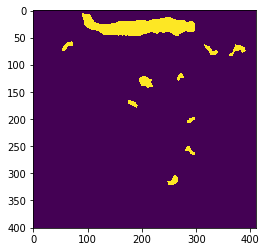

Raveling y
y's new shape (164410,)


In [10]:
height, width = labeledImageArray.shape
y = np.ones((height, width))
print(height, width)
for row in range(height):
    for col in range(width):
        y[row,col] = 1 if labeledImageArray[row,col] != 128 else 0

plot.show(y)

print("Raveling y")
y = np.ravel(y)
print("y's new shape", y.shape)

In [11]:
Xdf['class'] = y
Xdf

,coastal_aerosol,blue,green,red,vre1,vre2,vre3,nir,narrow_nir,water_vapour,swir_cirrus,swir2,class
0,1199.359985,1009.080017,987.719971,899.039978,1317.599976,2165.679932,2480.000000,2470.239990,1038.800049,10.12,2336.120117,1380.800049,0.0
1,1114.880005,858.919983,806.599976,620.080017,1013.760010,1941.880005,2251.080078,2222.520020,981.200012,10.48,1725.880005,935.840027,0.0
2,1180.280029,991.200012,972.640015,913.200012,1401.719971,2232.360107,2541.560059,2555.560059,1103.800049,11.44,2461.199951,1369.199951,0.0
3,1204.439941,1003.599976,970.239990,930.200012,1406.280029,2173.360107,2464.000000,2485.760010,1110.000000,12.36,2588.800049,1457.199951,0.0
4,1214.359985,1014.200012,983.200012,937.760010,1388.680054,2160.840088,2449.879883,2460.520020,1097.079956,12.00,2578.199951,1499.280029,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164405,1090.640015,846.760010,800.280029,635.080017,1024.560059,1967.880005,2300.360107,2254.560059,885.719971,7.64,1710.079956,881.880005,0.0
164406,1070.319946,847.400024,801.000000,641.679993,1037.680054,1991.839966,2330.280029,2283.320068,881.760010,7.68,1709.479980,882.080017,0.0
164407,1030.920044,772.719971,684.960022,486.959991,784.880005,1743.800049,2085.719971,2042.119995,815.840027,7.48,1219.000000,591.640015,0.0
164408,985.400024,715.280029,600.239990,372.079987,634.400024,1687.760010,2071.760010,2029.880005,782.880005,6.68,859.520020,362.959991,0.0


In [12]:
"""
    Finding subsets based on conditions in a column
"""
Xdf.loc[Xdf['class'] == 1.0] #YAHOO

,coastal_aerosol,blue,green,red,vre1,vre2,vre3,nir,narrow_nir,water_vapour,swir_cirrus,swir2,class
2551,1033.800049,786.359985,625.960022,437.440002,424.079987,421.959991,439.239990,370.559998,287.600006,8.00,237.240005,150.679993,1.0
2552,1020.320007,738.159973,534.760010,336.440002,310.799988,324.920013,325.519989,274.760010,170.520004,7.08,145.880005,96.680000,1.0
2553,1016.000000,761.159973,612.440002,396.519989,512.799988,891.200012,1016.479980,969.760010,431.440002,6.48,527.280029,264.959991,1.0
2961,1075.079956,867.039978,737.039978,557.599976,590.960022,739.359985,814.239990,746.760010,338.440002,8.36,444.959991,288.920013,1.0
2962,1085.680054,821.320007,624.320007,450.760010,430.519989,451.920013,452.839996,378.480011,177.800003,7.32,269.079987,208.479996,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131454,903.640015,653.479980,488.959991,296.880005,417.799988,898.039978,1038.719971,1011.799988,436.679993,7.48,684.679993,358.880005,1.0
131455,908.559998,655.320007,492.760010,305.480011,431.440002,888.239990,1007.320007,979.159973,415.440002,7.88,684.640015,353.200012,1.0
131456,913.760010,666.919983,516.280029,314.679993,473.880005,1067.479980,1238.599976,1204.520020,493.799988,7.16,826.119995,421.040009,1.0
131457,915.719971,669.039978,526.719971,320.279999,493.480011,1142.000000,1330.199951,1309.520020,553.400024,6.88,865.200012,439.160004,1.0


In [13]:
# Some metrics for our raw data
trueSamples = np.count_nonzero(y)
totalSamples = len(X)
falseSamples = totalSamples - trueSamples

print("Number of total pixels {0:20}".format(totalSamples))
print("Number of true pixels {0:21}".format(trueSamples))
print("Number of false pixels {0:20}".format(falseSamples))
print("Percentage of labeled %{:20}".format(round((trueSamples/totalSamples),2)* 100))

Number of total pixels               164410
Number of true pixels                  6624
Number of false pixels               157786
Percentage of labeled %                 4.0


### So, we're going to have to manipulate the sample so we don't run into imbalanced classes

In [14]:
"""
    ***** FOR y VALUES ******
    
    Need to duplicate the true pixels 20 times over
    This will yield 132500 true valued pixels

    Create a copy of X
"""
XoverSample = []
yOverSample = []
for idx, featureVector in enumerate(X):
    if y[idx] == 1:
        XoverSample.append(featureVector)
        X.remove(featureVector)
print(len(XoverSample))
print(len(X))


"""    
    Create a new y list (oversampleY)
    
    Find a true value pixel in y
    
    Cut the corresponding index in Xcopy and place it in a new list Xprime
    
    append a 1 in oversampleY
    
    Do this for every true y pixel
    
    the new list, will have all the true pixels in it
    
    should be the same length as the number of true pixels
    
    The remains of Xcopy will have only false pixels in it
    
    Take a random index of Xcopy and save it 
    
    
    Copy its corresponding index in X to a new list
    
"""

6624
157786


'    \n    Create a new y list (oversampleY)\n    \n    Find a true value pixel in y\n    \n    Cut the corresponding index in Xcopy and place it in a new list Xprime\n    \n    append a 1 in oversampleY\n    \n    Do this for every true y pixel\n    \n    the new list, will have all the true pixels in it\n    \n    should be the same length as the number of true pixels\n    \n    The remains of Xcopy will have only false pixels in it\n    \n    Take a random index of Xcopy and save it \n    \n    \n    Copy its corresponding index in X to a new list\n    \n'

In [15]:
tempX = XoverSample.copy()
for x in range(19):
    XoverSample.extend(tempX)

In [16]:
for x in range(len(XoverSample)):
    yOverSample.append(1)

In [17]:
print(len(yOverSample))

132480


In [18]:
import random
samp = random.sample(X, len(XoverSample))
XoverSample.extend(samp)

In [19]:
for x in range(132480):
    yOverSample.append(0)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_with_zero_mean = scaler.fit_transform(XoverSample)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_zero_mean, yOverSample, random_state=0, test_size=0.2)

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, verbose=1, warm_start=True)
sgd_clf.fit(X_train, y_train)

-- Epoch 1
Norm: 10.01, NNZs: 12, Bias: 0.124821, T: 211968, Avg. loss: 1.436280
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 10.08, NNZs: 12, Bias: -0.027772, T: 423936, Avg. loss: 0.801902
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 10.14, NNZs: 12, Bias: 0.262539, T: 635904, Avg. loss: 0.771286
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 10.30, NNZs: 12, Bias: 0.159590, T: 847872, Avg. loss: 0.759228
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 10.32, NNZs: 12, Bias: 0.153691, T: 1059840, Avg. loss: 0.752716
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 10.32, NNZs: 12, Bias: -0.015864, T: 1271808, Avg. loss: 0.748655
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 10.34, NNZs: 12, Bias: 0.057578, T: 1483776, Avg. loss: 0.745006
Total training time: 0.26 seconds.
-- Epoch 8
Norm: 10.38, NNZs: 12, Bias: -0.016739, T: 1695744, Avg. loss: 0.742796
Total training time: 0.29 seconds.
-- Epoch 9
Norm: 10.44, NNZs: 12, Bias: 0.055901, T: 1907712, Avg

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=True)

In [26]:
print("Test score: {:.2f}".format(sgd_clf.score(X_test, y_test)))

Test score: 0.68


In [1]:
# Undersampling will be much quicker
# Start with binary models
# SVM 
# Multi class classification for land pixels might be fruitful
# Implement a confusion matrix 
# SKLearn confusion matrix 


In [ ]:
# 1. Undersample 
# 2. Create Confusion Matrix
